<h1 align="center">ECE 9309 </h1>
<h2 align="center">Course Project -- Plant Disease Sorting </h2>
<h2 align="center">Bryce Dudley,</h2>
<h2 align="center">Nicholas Mitchell,</h2>
<h2 align="center">Bo Shan,</h2>
<h2 align="center">Evan Simpson,</h2>
<h2 align="center">Department of Electrical and Computer Engineering</h2>
<h2 align="center">Western University</h2>
<h2 align="center">Date: No Idea Yet </h2>
<h2 align="center">Submitted to Dr. Shami</h2>

In [1]:
# Do your includes 
# Include libraries that will be needed throughout the project for image processing

# Simple Insight Segmentation and Registration Toolkit
import SimpleITK as sitk

# Maltab plotting 
import matplotlib.pyplot as plt

# array manipulation 
import numpy as np

#Calculating block times 
import timeit

import os

# good for calucating region properties for images (maybe needed later so I haven't deleted it) 
from skimage.measure import label , regionprops
from skimage import data
from skimage.color import rgb2hsv

import pandas as pd

import RemoveBackgroundController as rbc

import imageio
#check to see if sitk is working 
print(sitk.Version())

SimpleITK Version: 1.2.3 (ITK 4.13)
Compiled: Oct 12 2019 17:33:22



In [2]:
path_to_dataset = "../../dataset/PlantVillage/RGB"
leaf_segment_dataset = "../../dataset/PlantVillage/LeafSegment"
list_of_directories = os.listdir(path_to_dataset)

list_of_plants = ['pepper', 'potato', 'tomato']
list_of_diseases = ['healthy', 'bacterial_spot', 'early_blight', 'late_blight',
                    'target_spot', 'mosaic_virus', 'yellowleaf', 'leaf_mold', 'septoria_leaf_spot', 'spider_mites']

# make the correct out folders 
try: 
    os.mkdir(leaf_segment_dataset)
except:
    pass

# manually make directories that are not awful with underscore and caps+ not caps BS :) :) 
# pepper healthy
try: 
    os.mkdir(leaf_segment_dataset+"/"+list_of_plants[0]+"_"+list_of_diseases[0])
except:
    pass

# pepper bacterial_spot
try: 
    os.mkdir(leaf_segment_dataset+"/"+list_of_plants[0]+"_"+list_of_diseases[1])
except:
    pass

# potato early_blight
try: 
    os.mkdir(leaf_segment_dataset+"/"+list_of_plants[1]+"_"+list_of_diseases[2])
except:
    pass

# potato healthy
try: 
    os.mkdir(leaf_segment_dataset+"/"+list_of_plants[1]+"_"+list_of_diseases[0])
except:
    pass

# potato late_blight
try: 
    os.mkdir(leaf_segment_dataset+"/"+list_of_plants[1]+"_"+list_of_diseases[3])
except:
    pass

# tomato has all of them so I will iterate through all the diseases
for disease in list_of_diseases:
    try: 
        os.mkdir(leaf_segment_dataset+"/"+list_of_plants[2]+"_"+disease)
    except:
        pass

In [3]:
PlantValues = pd.read_csv("dataset/PlantVillage/dataset_labels.csv")

In [4]:
[size,y] = PlantValues.shape
PlantValues.head()

Unnamed: 0                                           filename   plant  \
0           0  0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Sp...  pepper   
1           1  006adb74-934f-448f-a14f-62181742127b___JR_B.Sp...  pepper   
2           2  00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Sp...  pepper   
3           3  01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Sp...  pepper   
4           4  0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B....  pepper   

          disease  
0  bacterial_spot  
1  bacterial_spot  
2  bacterial_spot  
3  bacterial_spot  
4  bacterial_spot

In [5]:
path_to_dataset = "dataset/PlantVillage/RGB"

# the real size is 20,639 images. Thats too much for small testing purposes 

#for testing purposes i will make size smaller and multiplier larger to get a better breadth of data 
mult = 1
# size = 1000

image_set = {} 
healthy_size = 0
for i in range(0,size):
    #check to see if the plant is "healthy"
    if(PlantValues.disease[i*mult] == "healthy"):
        image_set[healthy_size] = rbc.RemoveBackgroundController(PlantValues.filename[i*mult],
                                                 PlantValues.plant[i*mult] + '_' +PlantValues.disease[i*mult],
                                                 path_to_dataset)
        healthy_size = healthy_size+1
        #print(image_set[healthy_size-1].name)

In [16]:
print("Number of healthy images: "+str(healthy_size))
for i in range(0,healthy_size):
    if(image_set[i].working==0):
        print("Error Loading: "+image_set[i].name+"/"+image_set[i].filename)

Number of healthy images: 3221
Error Loading: pepper_healthy/42f083e2-272d-4f83-ad9a-573ee90e50ec___Screen Shot 2015-05-06 at 4.01.13 PM.png


pepper_healthy


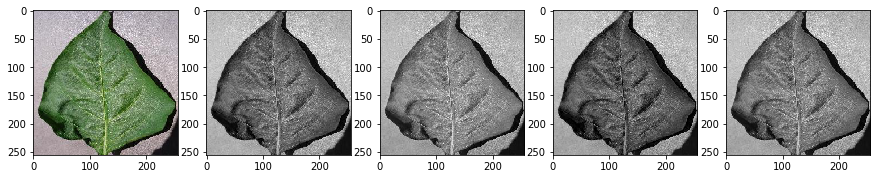

In [6]:
# Show the images 
plt.subplots(1,5,figsize=(15,15))

#change set num to see a different leaf
setnum = 0

# show the images 
for i in range (0,5):
    plt.subplot(1,5,i+1)
    if(i==0):
        plt.imshow(image_set[setnum].array_rgb,cmap='gray')
    else:
        plt.imshow(image_set[setnum].channel[i-1],cmap='gray')   
        
print(image_set[setnum].name)

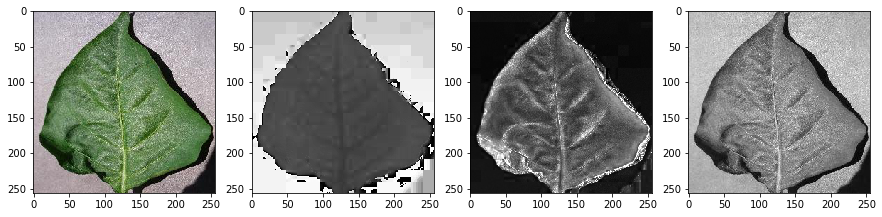

In [7]:
# Show the images 
plt.subplots(1,4,figsize=(15,15))

for i in range(0,4):
    plt.subplot(1,4,i+1)
    if(i==0):
        plt.imshow(image_set[setnum].array_rgb,cmap='gray')
    else:
        plt.imshow(image_set[setnum].channel[i+3],cmap='gray')   

In [8]:
# Remove Background Nick Method 
for i in range(0,healthy_size):
    image_set[i].RemoveBackgroundBo2()
    

<h1 align="left">Bo Processing on healthy plant images</h1>

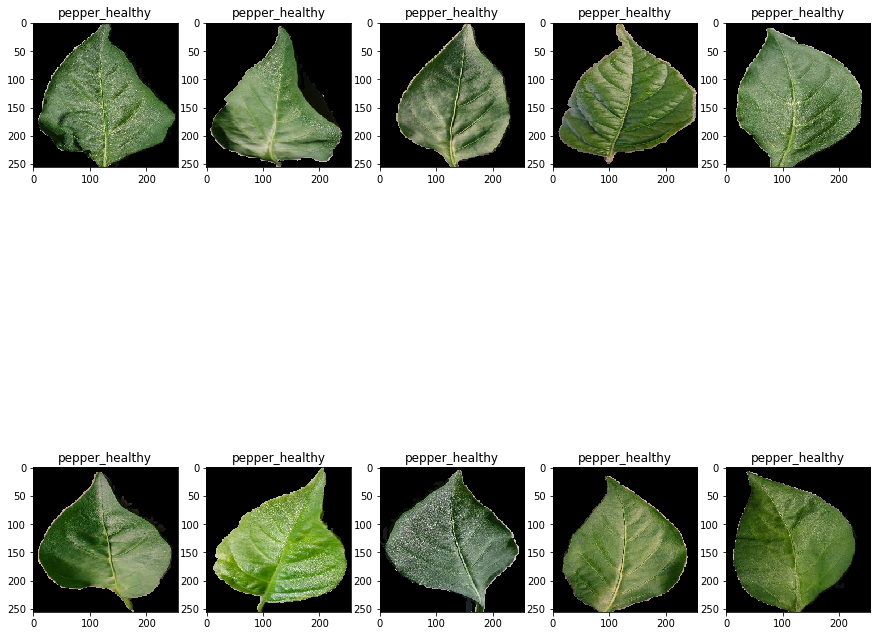

In [10]:
# show the images of removed background 

# Show the images 
plt.subplots(2,5,figsize=(15,15))

# show the first 10
for i in range (0,10):
    plt.subplot(2,5,i+1)
    plt.imshow(image_set[i].final/255,cmap='gray')
    plt.title(image_set[i].name)

In [ ]:
# imageio.imwrite("dataset/PlantVillage/LeafSegment/" + image_set[0].name + "/" +image_set[0].filename,
#                image_set[0].final)

<h1 align="left">Bo Hue Channel Otsu </h1>

<h1 align="left">Bo Saturation Channel Otsu</h1>